In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url= 'https://www.tipranks.com/trending-stocks'

In [4]:
browser= webdriver.Chrome()

In [5]:
browser.get(url)

In [6]:
# Creating a CLASs that iterates over the Browser element
class get_element(object):
    
    # initializing
    # locator: to locate elements
    # n: to get the NUMBER of elements
    def __init__(self, locator, n):
        self.locator= locator
        self.n= n
        
    # call function for Iteration using the BROWSER to 
    # find element by LOCATING each WEB element
    def __call__(self, browser):
        
        element= browser.find_elements(*self.locator)
        
        # compare the number of elements
        if len(element) >= self.n:
            return element
        else:
            return False

In [7]:
# BROWSER waiting time
# WAIT for atleast 10 seconds
browser.implicitly_wait(10)

In [8]:
# LOCATE the searched CONTENTS wherre the ITERATION will take place
# DIV element from the Content
div_element= browser.find_element_by_xpath('//*[@id="app"]/div/div/main/div/div/div[2]/div[2]/div/div/div[1]/ul')

In [9]:
# LOCATE each INDIVIDUAL element from the WEB element

# stock INFO:
locator_stock_info= (By.CLASS_NAME,'client-components-ratings-trending-stock-row__stockInfo')

# stock Consensus 
locator_stock_consensus= (By.CLASS_NAME,'client-components-ratings-trending-stock-row__consensus')

# stock Target Price
locator_stoc_tgt_price= (By.CLASS_NAME, 'client-components-ratings-trending-stock-row__priceTarget')

# Stock Rating
locator_stock_weigth= (By.CLASS_NAME,'client-components-ratings-trending-stock-row__trendGraph')

In [10]:
# iteration of each element
stock_info_cnt=0
stock_cons_cnt= 0
stock_price_cnt= 0
stock_weight_cnt= 0

# RECORDS of empty list
stock_info_rec= []
stock_info_cons= []
stock_info_price= []
stock_weight_rec= []


# create while loop 
while True:
    
    # use browser script for iteration over the browser DIV element 
    browser.execute_script(
    'arguments[0].scrollTop= arguments[0].scrollHeight', div_element
    )
    
    # use TRY and catch error method to ITERATE using the CLASS 
    
    try:
        # RECORD each iteration and wait for 3 seconds until ITERATIng other element
        stock_info= WebDriverWait(browser, 3).until(
            # USING THe located elmenets from the SECtion
            get_element(locator_stock_info, stock_info_cnt +1)
        )
        
        # stock consesnus
        stock_cons= WebDriverWait(browser, 3).until(
            get_element(locator_stock_consensus, stock_cons_cnt +1)
        )
        
        # stock PRICE target
        stock_tgt_price= WebDriverWait(browser, 3).until(
            get_element(locator_stoc_tgt_price, stock_price_cnt +1)
        )
        
        # stock Weight cnt
        stock_wgt_total_cnt= WebDriverWait(browser, 3).until(
            get_element(locator_stock_weigth, stock_weight_cnt+ 1)
        )
        
    except TimeoutException as EC:
        break
        
    # update the COLLECTED record info UNLESS returns FALSE
    # number of RECORDS collected 
    stock_info_cnt= len(stock_info)
    stock_cons_cnt= len(stock_cons)
    stock_price_cnt= len(stock_tgt_price)
    stock_weight_cnt = len(stock_wgt_total_cnt)
    
    for single_stock_info in stock_info:
        stock_info_rec.append(single_stock_info.text)
        
    for single_stock_cons in stock_cons:
        stock_info_cons.append(single_stock_cons.text)
        
    for single_stock_price in stock_tgt_price:
        stock_info_price.append(single_stock_price.text)  
        
       
    for stock_weigh in stock_wgt_total_cnt:
        stock_weight_rec.append(stock_weigh.text)
    

In [11]:
# QUIT
browser.quit()

In [12]:
len(stock_info_price), len(stock_info_cons), len (stock_info_rec)

(21, 21, 21)

In [13]:
len(stock_weight_rec)

21

In [14]:
stock_weight_rec

['Ratings in \nLast 30 Days',
 '31\n28 Buy\n3 Hold\n0 Sell',
 '30\n22 Buy\n6 Hold\n2 Sell',
 '29\n11 Buy\n12 Hold\n6 Sell',
 '27\n27 Buy\n0 Hold\n0 Sell',
 '26\n19 Buy\n5 Hold\n2 Sell',
 '25\n23 Buy\n2 Hold\n0 Sell',
 '25\n24 Buy\n1 Hold\n0 Sell',
 '23\n23 Buy\n0 Hold\n0 Sell',
 '22\n7 Buy\n10 Hold\n5 Sell',
 '21\n14 Buy\n5 Hold\n2 Sell',
 '21\n12 Buy\n9 Hold\n0 Sell',
 '21\n19 Buy\n2 Hold\n0 Sell',
 '20\n14 Buy\n5 Hold\n1 Sell',
 '19\n5 Buy\n14 Hold\n0 Sell',
 '18\n10 Buy\n7 Hold\n1 Sell',
 '18\n8 Buy\n10 Hold\n0 Sell',
 '18\n13 Buy\n5 Hold\n0 Sell',
 '18\n15 Buy\n2 Hold\n1 Sell',
 '18\n10 Buy\n8 Hold\n0 Sell',
 '17\n17 Buy\n0 Hold\n0 Sell']

# Creating the DATAFRAME

In [15]:

df_stock_rec= pd.DataFrame({'Stock_info': stock_info_rec, 'Price_Target':stock_info_price, 'Consensus': stock_info_cons,'stock_weigh': stock_weight_rec })

In [16]:
df_stock_rec.head(3)

,Stock_info,Price_Target,Consensus,stock_weigh
0,Company,Average\nPrice Target,Overall Consensus,Ratings in \nLast 30 Days
1,4 days ago\nFacebook(FB)\n268.101.61(0.60%),$340.64,Strong Buy,31\n28 Buy\n3 Hold\n0 Sell
2,16 days ago\nNetflix(NFLX)\n550.791.37(0.25%),$632.90,Moderate Buy,30\n22 Buy\n6 Hold\n2 Sell


# Feature Engineering
- Extract Stock symbols
- Extract Stock Upgrade Time
- Extract Stock Current Price
- Change Data Type. EG: Stock Price (Object) --> Float

# REMOVING first index of Data Frame

In [17]:
df_stock_rec= df_stock_rec.drop(df_stock_rec.index[0])
df_stock_rec

,Stock_info,Price_Target,Consensus,stock_weigh
1,4 days ago\nFacebook(FB)\n268.101.61(0.60%),$340.64,Strong Buy,31\n28 Buy\n3 Hold\n0 Sell
2,16 days ago\nNetflix(NFLX)\n550.791.37(0.25%),$632.90,Moderate Buy,30\n22 Buy\n6 Hold\n2 Sell
3,6 days ago\nIntel(INTC)\n58.180.61(1.04%),$62.31,Hold,29\n11 Buy\n12 Hold\n6 Sell
4,3 days ago\nAmazon(AMZN)\n3352.1521.15(0.63%),"$4,106.14",Strong Buy,27\n27 Buy\n0 Hold\n0 Sell
5,3 days ago\nApple(AAPL)\n136.760.42(0.31%),$149.92,Moderate Buy,26\n19 Buy\n5 Hold\n2 Sell
6,2 days ago\nPaypal Holdings(PYPL)\n269.440.99(...,$292.44,Strong Buy,25\n23 Buy\n2 Hold\n0 Sell
7,3 days ago\nAlphabet Class A(GOOGL)\n2088.8335...,"$2,312.11",Strong Buy,25\n24 Buy\n1 Hold\n0 Sell
8,4 days ago\nMicrosoft(MSFT)\n242.200.19(0.08%),$280.73,Strong Buy,23\n23 Buy\n0 Hold\n0 Sell
9,4 days ago\nTesla(TSLA)\n852.232.24(0.26%),$609.00,Hold,22\n7 Buy\n10 Hold\n5 Sell
10,Yesterday\nSnap(SNAP)\n63.645.33(9.14%),$61.02,Moderate Buy,21\n14 Buy\n5 Hold\n2 Sell


In [18]:
import re # Regular Expression COMPILER

# EXMPLE of RAW DATA

In [19]:
MU= df_stock_rec.iloc[2, 0]
MU

'6 days ago\nIntel(INTC)\n58.180.61(1.04%)'

# Creating a Function that will COMPILE and MANIPULATE the STRINGS that has been EXTRACTED

# 1. Stock Symbol Extract

In [20]:
def extract_sym(stk):
    
    # checks over the strings that are UPPERCASE repeated Consecutively
    split_wd= re.compile('\(+[A-Z]+\)')
    symbl= split_wd.findall(stk)

    # Stored on LIST
    symbl_extracted= symbl[0]

    # Replace any Signs
    new_sym= symbl_extracted.replace('(','')
    new_sym= new_sym.replace(')','')
    return new_sym

In [21]:
stk_id= df_stock_rec.iloc[8, 0]
extract_sym(stk_id)

'TSLA'

In [22]:
# EMPTY list for STOCK symbols


stock_symbol= []

for stock_num in range(len(df_stock_rec)):
   
    stock_id= df_stock_rec.iloc[stock_num, 0]
    # adding the SYMBOLS in a new LIST
    stock_symbol.append(extract_sym(stock_id))

In [23]:
stock_symbol

['FB',
 'NFLX',
 'INTC',
 'AMZN',
 'AAPL',
 'PYPL',
 'GOOGL',
 'MSFT',
 'TSLA',
 'SNAP',
 'CMG',
 'MU',
 'AMD',
 'CNI',
 'BIIB',
 'EBAY',
 'NXPI',
 'ON',
 'SBUX',
 'NOW']

# CREATING a new column on DATA FRAME

In [24]:
df_stock_rec['stock']= pd.Series(stock_symbol, index= df_stock_rec.index)

In [25]:
df_stock_rec.iloc[0, 1]

'$340.64'

# REMOVE expression from Price_Target Column
# Change the Data Type of 'Price_Target' Column

In [26]:
# REMOVE '$' SIGN 

for dollar in range(len(df_stock_rec['Price_Target'])):
    df_stock_rec['Price_Target']= df_stock_rec['Price_Target'].str.replace('$','')

In [27]:
df_stock_rec

,Stock_info,Price_Target,Consensus,stock_weigh,stock
1,4 days ago\nFacebook(FB)\n268.101.61(0.60%),340.64,Strong Buy,31\n28 Buy\n3 Hold\n0 Sell,FB
2,16 days ago\nNetflix(NFLX)\n550.791.37(0.25%),632.90,Moderate Buy,30\n22 Buy\n6 Hold\n2 Sell,NFLX
3,6 days ago\nIntel(INTC)\n58.180.61(1.04%),62.31,Hold,29\n11 Buy\n12 Hold\n6 Sell,INTC
4,3 days ago\nAmazon(AMZN)\n3352.1521.15(0.63%),"4,106.14",Strong Buy,27\n27 Buy\n0 Hold\n0 Sell,AMZN
5,3 days ago\nApple(AAPL)\n136.760.42(0.31%),149.92,Moderate Buy,26\n19 Buy\n5 Hold\n2 Sell,AAPL
6,2 days ago\nPaypal Holdings(PYPL)\n269.440.99(...,292.44,Strong Buy,25\n23 Buy\n2 Hold\n0 Sell,PYPL
7,3 days ago\nAlphabet Class A(GOOGL)\n2088.8335...,"2,312.11",Strong Buy,25\n24 Buy\n1 Hold\n0 Sell,GOOGL
8,4 days ago\nMicrosoft(MSFT)\n242.200.19(0.08%),280.73,Strong Buy,23\n23 Buy\n0 Hold\n0 Sell,MSFT
9,4 days ago\nTesla(TSLA)\n852.232.24(0.26%),609.00,Hold,22\n7 Buy\n10 Hold\n5 Sell,TSLA
10,Yesterday\nSnap(SNAP)\n63.645.33(9.14%),61.02,Moderate Buy,21\n14 Buy\n5 Hold\n2 Sell,SNAP


In [29]:
# Change Data Type of Price Target Values

for dollar in range(len(df_stock_rec['Price_Target'])):
    df_stock_rec['Price_Target']= df_stock_rec['Price_Target'].astype(float)


In [30]:
df_stock_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Stock_info    20 non-null     object
 1   Price_Target  20 non-null     object
 2   Consensus     20 non-null     object
 3   stock_weigh   20 non-null     object
 4   stock         20 non-null     object
dtypes: object(5)
memory usage: 960.0+ bytes


# 2. Time of Stock Upgrade

# 3. Extract Actual/ Daily Stock Price

In [31]:
MU # EXAMPLE, info to EXTRACT

'6 days ago\nIntel(INTC)\n58.180.61(1.04%)'

In [32]:
# pass the COLUMN in this function
def extract_actual_price(df_stk):
    # empty list to get Current Stk price
    curr_pr=[]   
    
    for stk in range(len(df_stk)):
        # ITERATE and SEARCH for the float value (DAILY Stock Price)
        stk_flt_pr= re.search('[+-]?[0-9]+\.[0-9]+',df_stk.iloc[stk, 0])
        
        # Load the First element on the LIST
        curr_pr.append(stk_flt_pr.group(0))
    
    return curr_pr
        
        # get EACH item by ITERATING throught the 

In [33]:
MU

'6 days ago\nIntel(INTC)\n58.180.61(1.04%)'

In [34]:
stk_flt_price= re.search('[+-]?[0-9]+\.[0-9]+', df_stock_rec.iloc[2, 0])
print(stk_flt_price)

<re.Match object; span=(23, 29), match='58.180'>


In [35]:
stk_flt_price.group(0)

'58.180'

# ADDING the ACTUAL/DAILY price on a new coulmn

In [36]:

# Change data TYPE of actual price
df_stock_rec['Daily_price']= extract_actual_price(df_stock_rec)

for dollar in range(len(df_stock_rec['Daily_price'])):
    df_stock_rec['Daily_price']= df_stock_rec['Daily_price'].astype(float)
    
    
df_stock_rec

,Stock_info,Price_Target,Consensus,stock_weigh,stock,Daily_price
1,4 days ago\nFacebook(FB)\n268.101.61(0.60%),340.64,Strong Buy,31\n28 Buy\n3 Hold\n0 Sell,FB,268.1010
2,16 days ago\nNetflix(NFLX)\n550.791.37(0.25%),632.90,Moderate Buy,30\n22 Buy\n6 Hold\n2 Sell,NFLX,550.7910
3,6 days ago\nIntel(INTC)\n58.180.61(1.04%),62.31,Hold,29\n11 Buy\n12 Hold\n6 Sell,INTC,58.1800
4,3 days ago\nAmazon(AMZN)\n3352.1521.15(0.63%),"4,106.14",Strong Buy,27\n27 Buy\n0 Hold\n0 Sell,AMZN,3352.1521
5,3 days ago\nApple(AAPL)\n136.760.42(0.31%),149.92,Moderate Buy,26\n19 Buy\n5 Hold\n2 Sell,AAPL,136.7600
6,2 days ago\nPaypal Holdings(PYPL)\n269.440.99(...,292.44,Strong Buy,25\n23 Buy\n2 Hold\n0 Sell,PYPL,269.4400
7,3 days ago\nAlphabet Class A(GOOGL)\n2088.8335...,"2,312.11",Strong Buy,25\n24 Buy\n1 Hold\n0 Sell,GOOGL,2088.8335
8,4 days ago\nMicrosoft(MSFT)\n242.200.19(0.08%),280.73,Strong Buy,23\n23 Buy\n0 Hold\n0 Sell,MSFT,242.2000
9,4 days ago\nTesla(TSLA)\n852.232.24(0.26%),609.00,Hold,22\n7 Buy\n10 Hold\n5 Sell,TSLA,852.2320
10,Yesterday\nSnap(SNAP)\n63.645.33(9.14%),61.02,Moderate Buy,21\n14 Buy\n5 Hold\n2 Sell,SNAP,63.6450


# CLEANED data set

In [37]:
df_stock_rec

,Stock_info,Price_Target,Consensus,stock_weigh,stock,Daily_price
1,4 days ago\nFacebook(FB)\n268.101.61(0.60%),340.64,Strong Buy,31\n28 Buy\n3 Hold\n0 Sell,FB,268.1010
2,16 days ago\nNetflix(NFLX)\n550.791.37(0.25%),632.90,Moderate Buy,30\n22 Buy\n6 Hold\n2 Sell,NFLX,550.7910
3,6 days ago\nIntel(INTC)\n58.180.61(1.04%),62.31,Hold,29\n11 Buy\n12 Hold\n6 Sell,INTC,58.1800
4,3 days ago\nAmazon(AMZN)\n3352.1521.15(0.63%),"4,106.14",Strong Buy,27\n27 Buy\n0 Hold\n0 Sell,AMZN,3352.1521
5,3 days ago\nApple(AAPL)\n136.760.42(0.31%),149.92,Moderate Buy,26\n19 Buy\n5 Hold\n2 Sell,AAPL,136.7600
6,2 days ago\nPaypal Holdings(PYPL)\n269.440.99(...,292.44,Strong Buy,25\n23 Buy\n2 Hold\n0 Sell,PYPL,269.4400
7,3 days ago\nAlphabet Class A(GOOGL)\n2088.8335...,"2,312.11",Strong Buy,25\n24 Buy\n1 Hold\n0 Sell,GOOGL,2088.8335
8,4 days ago\nMicrosoft(MSFT)\n242.200.19(0.08%),280.73,Strong Buy,23\n23 Buy\n0 Hold\n0 Sell,MSFT,242.2000
9,4 days ago\nTesla(TSLA)\n852.232.24(0.26%),609.00,Hold,22\n7 Buy\n10 Hold\n5 Sell,TSLA,852.2320
10,Yesterday\nSnap(SNAP)\n63.645.33(9.14%),61.02,Moderate Buy,21\n14 Buy\n5 Hold\n2 Sell,SNAP,63.6450


In [38]:
df_stock_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Stock_info    20 non-null     object 
 1   Price_Target  20 non-null     object 
 2   Consensus     20 non-null     object 
 3   stock_weigh   20 non-null     object 
 4   stock         20 non-null     object 
 5   Daily_price   20 non-null     float64
dtypes: float64(1), object(5)
memory usage: 1.1+ KB


# USING label ENCODER to encode the Sock Consensus

In [39]:
df_stock_rec.iloc[0, 2]

'Strong Buy'

# Convert Stock RATING 

In [40]:

w= ['Moderate Buy', 'Strong Buy', 'Hold']
for stk in range(len(df_stock_rec['Consensus'])):
    
    if (df_stock_rec.iloc[stk, 2] == w[0]):
        df_stock_rec= df_stock_rec.replace(df_stock_rec.iloc[stk, 2], 'M')
    elif (df_stock_rec.iloc[stk, 2] == w[1]):
        df_stock_rec= df_stock_rec.replace(df_stock_rec.iloc[stk, 2], 'S')
    elif (df_stock_rec.iloc[stk, 2] == w[2]):
        df_stock_rec= df_stock_rec.replace(df_stock_rec.iloc[stk, 2], 'H')

        
# CONVERSION to strings
for stk in range(len(df_stock_rec['Consensus'])):
    df_stock_rec['Consensus']= df_stock_rec['Consensus'].astype(str)

In [41]:
df_stock_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Stock_info    20 non-null     object 
 1   Price_Target  20 non-null     object 
 2   Consensus     20 non-null     object 
 3   stock_weigh   20 non-null     object 
 4   stock         20 non-null     object 
 5   Daily_price   20 non-null     float64
dtypes: float64(1), object(5)
memory usage: 1.1+ KB


In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_en= LabelEncoder()
#label_one_hot= OneHotEncoder()

# CREATE new column 
analyst_wgh= label_en.fit_transform(df_stock_rec['Consensus'])

df_stock_rec['Analyst_weigh']= analyst_wgh
df_stock_rec

,Stock_info,Price_Target,Consensus,stock_weigh,stock,Daily_price,Analyst_weigh
1,4 days ago\nFacebook(FB)\n268.101.61(0.60%),340.64,S,31\n28 Buy\n3 Hold\n0 Sell,FB,268.1010,2
2,16 days ago\nNetflix(NFLX)\n550.791.37(0.25%),632.90,M,30\n22 Buy\n6 Hold\n2 Sell,NFLX,550.7910,1
3,6 days ago\nIntel(INTC)\n58.180.61(1.04%),62.31,H,29\n11 Buy\n12 Hold\n6 Sell,INTC,58.1800,0
4,3 days ago\nAmazon(AMZN)\n3352.1521.15(0.63%),"4,106.14",S,27\n27 Buy\n0 Hold\n0 Sell,AMZN,3352.1521,2
5,3 days ago\nApple(AAPL)\n136.760.42(0.31%),149.92,M,26\n19 Buy\n5 Hold\n2 Sell,AAPL,136.7600,1
6,2 days ago\nPaypal Holdings(PYPL)\n269.440.99(...,292.44,S,25\n23 Buy\n2 Hold\n0 Sell,PYPL,269.4400,2
7,3 days ago\nAlphabet Class A(GOOGL)\n2088.8335...,"2,312.11",S,25\n24 Buy\n1 Hold\n0 Sell,GOOGL,2088.8335,2
8,4 days ago\nMicrosoft(MSFT)\n242.200.19(0.08%),280.73,S,23\n23 Buy\n0 Hold\n0 Sell,MSFT,242.2000,2
9,4 days ago\nTesla(TSLA)\n852.232.24(0.26%),609.00,H,22\n7 Buy\n10 Hold\n5 Sell,TSLA,852.2320,0
10,Yesterday\nSnap(SNAP)\n63.645.33(9.14%),61.02,M,21\n14 Buy\n5 Hold\n2 Sell,SNAP,63.6450,1


# SCATTER PLOT:
- Actual Market Price and Target Price

In [43]:
import seaborn as sns; sns.set()

# MARKER size based on the PRICE

shp=[20*j for j in range(20) ]



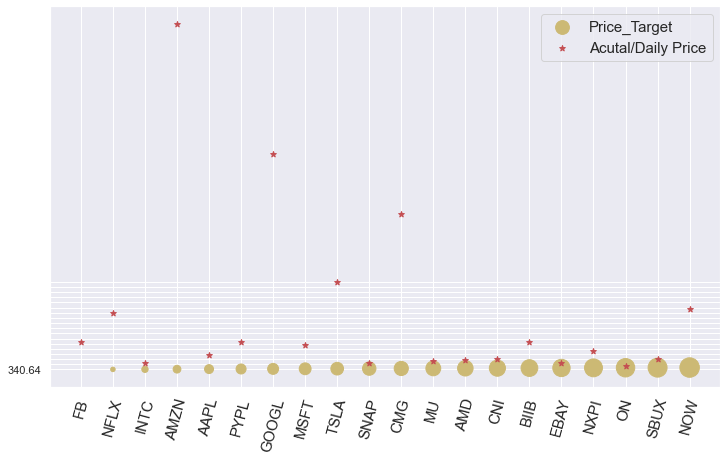

In [44]:

plt.scatter(df_stock_rec['stock'], df_stock_rec['Price_Target'], color='y',s= shp, label='Price_Target')
plt.scatter(df_stock_rec['stock'], df_stock_rec['Daily_price'], color='r',marker='*', label='Acutal/Daily Price')
plt.legend(loc="upper right", fontsize=15)
plt.gcf().set_size_inches(12,7)
plt.yticks(np.arange(0,900, 50))
plt.xticks(rotation= 75, fontsize=15);